### Imports

In [4]:
import pandas as pd
import numpy as np
import scipy.optimize as optimize
from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline
import scipy.integrate as integrate
import matplotlib.pyplot as plt

**Analysis Date**: 1st December 2020

**Contract Expiry**: 1 year

### Rate Model Calibration
Fed Fund Rates: https://fred.stlouisfed.org/series/dff

Yield Curve Data: https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yieldAll

The code below corresponds to **Section 3.1** in the report. Particularly the point where we calibrate 'a' and 'sigma' using the current term structure of volatility 

In [18]:
r_0 = 0.0009 ## Effective Fed Fund rate as of 1st Dec 2020

# Reading the yield data and estimating a and sigma as mentioned in our report
yld_data = pd.read_excel("Yield_Curve_1stDec19_to_1stDec20.xlsx").set_index("Date")

yld_data = yld_data*0.01
yld_data = yld_data.iloc[:,:-2]

yld_vols = yld_data.describe().loc["std"].values
tau = np.array([1/12, 2/12, 3/12, 6/12, 1, 2, 3, 5, 7, 10])
def sig_tau(tau, a, sig):
    return 1/a * (1-np.exp(-a*tau)) * 1/tau *sig

popt, pcov = optimize.curve_fit(sig_tau, tau, yld_vols)
a, sig = popt
print(f"    a = {a}")
print(f"sigma = {sig}")

[0.00628941 0.00625313 0.00617611 0.00608424 0.00579875 0.0056957
 0.00555021 0.00520907 0.00484724 0.00445437]
    a = 0.07293725627718432
sigma = 0.006201187740464167


In [12]:
yld_data

,1 mo,2 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr
Date,,,,,,,,,,
12/02/19,0.0160,0.0158,0.0160,0.0162,0.0160,0.0161,0.0163,0.0165,0.0177,0.0183
12/03/19,0.0156,0.0154,0.0157,0.0157,0.0157,0.0153,0.0154,0.0154,0.0165,0.0172
12/04/19,0.0159,0.0154,0.0155,0.0156,0.0156,0.0158,0.0158,0.0160,0.0171,0.0177
12/05/19,0.0152,0.0156,0.0154,0.0155,0.0156,0.0158,0.0160,0.0162,0.0173,0.0180
12/06/19,0.0152,0.0155,0.0153,0.0156,0.0157,0.0161,0.0164,0.0167,0.0178,0.0184
12/09/19,0.0154,0.0154,0.0154,0.0158,0.0156,0.0163,0.0163,0.0167,0.0177,0.0183
12/10/19,0.0153,0.0155,0.0156,0.0157,0.0156,0.0165,0.0167,0.0168,0.0178,0.0185
12/11/19,0.0154,0.0156,0.0157,0.0158,0.0155,0.0161,0.0162,0.0164,0.0174,0.0179
12/12/19,0.0157,0.0157,0.0156,0.0157,0.0155,0.0166,0.0169,0.0173,0.0184,0.0190


In this section we use the current yield curve to derive the functional forms required for the calculations mentioned in **section 3.1** of the report

In [3]:
yld_fwd_data = pd.read_excel("Yield Curve and Forward Curve - 1st Dec 2020.xlsx")
yld_fwd_data = yld_fwd_data[:-2]
yld_fwd_data["ZCB_Prices"] = np.exp(-yld_fwd_data["Yield"]*yld_fwd_data["Period"])

# Function that fits the current term structure
f2 = UnivariateSpline(yld_fwd_data["Period"], yld_fwd_data["Yield"], k=3)

# Required Functions
def instant_fwd(t):
    return r_0 + t*f2.derivative()(t) # r_0 later gets reset during the simulations

def inst_fwd_der(t):
    return 2*f2.derivative()(t) + t*f2.derivative().derivative()(t)

def theta_t(t):
    return inst_fwd_der(t) + a*instant_fwd(t) + sig**2/(2*a)*(1-np.exp(-2*a*t))

def capital_B(t,T):
    return 1/a*(1-np.exp(-a*(T-t)))

def capital_A(t,T):
    result = integrate.quad(lambda x: 0.5*(sig**2)*(capital_B(x,T)**2)-theta_t(x)*capital_B(x,T), t, T)
    return result[0]

def price_t_T(r_t,t,T):
    return np.exp(capital_A(t,T)-capital_B(t,T)*r_t)  

def r_0_tau(r0,tau):
    return -capital_A(0,tau)/(tau+0.00001) + 1/a*(1-np.exp(-a*(tau)))/(tau)*r0

In this section we plot the graphs shown in **section 3.1** of the report

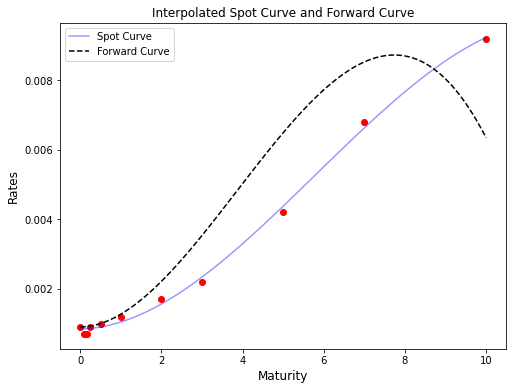

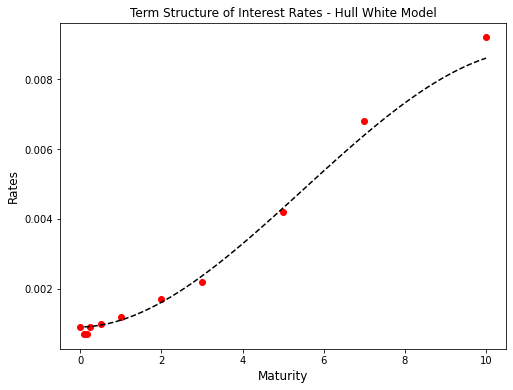

C:\Users\Pranav\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


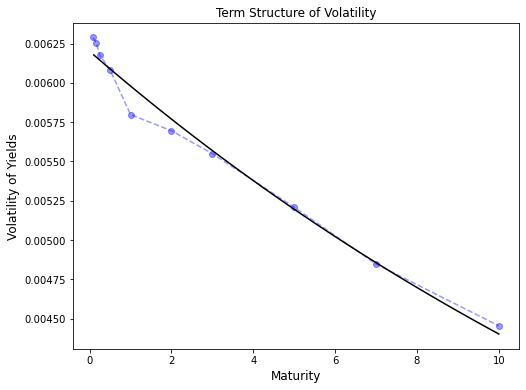

In [4]:
# Plot 1
xnew = np.linspace(0, 10, num=100, endpoint=True)
plt.figure(figsize=(8,6))
plt.scatter(yld_fwd_data["Period"], yld_fwd_data["Yield"],color="red", marker='o') 
plt.plot(xnew, f2(xnew), color="blue", linestyle = '-', alpha=.4, label="Spot Curve" )
plt.plot(xnew, instant_fwd(xnew), color="black", linestyle='--', label="Forward Curve")
plt.title("Interpolated Spot Curve and Forward Curve")
plt.xlabel("Maturity",fontsize=12)
plt.ylabel("Rates",fontsize=12)
plt.legend()
plt.show()

# Plot 2
HW_ts = pd.DataFrame()
HW_ts["time"] = np.linspace(0, 10, 100, endpoint=True)
HW_ts["HW_yield"] = HW_ts["time"].apply(lambda x: r_0_tau(r_0, x))
plt.figure(figsize=(8,6))
plt.scatter(yld_fwd_data["Period"], yld_fwd_data["Yield"], color="red", marker='o')
plt.plot(HW_ts["time"], HW_ts["HW_yield"], color="black", linestyle='--')
plt.title("Term Structure of Interest Rates - Hull White Model")
plt.xlabel("Maturity",fontsize=12)
plt.ylabel("Rates",fontsize=12)
plt.show()

# Plot 3
plt.figure(figsize=(8,6))
plt.plot(tau, yld_vols, color="blue", linestyle="--", marker='o', alpha=0.4, label="Data")
plt.plot(xnew, capital_B(0,xnew)/xnew*sig, color="black",  linestyle="-", label="Hull-White")
plt.title("Term Structure of Volatility")
plt.xlabel("Maturity",fontsize=12)
plt.ylabel("Volatility of Yields",fontsize=12)
plt.show()

3-month libor 9 months from 1st Dec 2020 

**Note:** This isn't the LIBOR rate seen in the market but is rather based on the definitions mentioned in **section 1** 

In [5]:
curr_lib = 1/(1-9/12)*(price_t_T(r_0,0,9/12)/price_t_T(r_0,0,1)-1)
curr_lib

0.0013415003418515425

These parameters are used in the pricer

In [6]:
rates_params = [r_0, a, sig, curr_lib]

### GBM Calibration

This corresponds to **section 3.2** of the report. The details regarding the estimation of these parameters can be found in the attached excel file

In [7]:
# self.s0, self.rf, self.corr_sf_X, self.sig_sf, self.vol_X = equity_model_params
s0 = 3525.24 # STOXX50E level as of 1st December 2020
rf = 0.0 # Foreign interest rate
rho_sf_X = 0.198708
sf_vol = 0.18 # from the volatility surface
x_vol = 0.06275 # from the volatility surface
gbm_params = [s0, rf, rho_sf_X, sf_vol, x_vol]

#### Pricing - Monte Carlo

In [8]:
class structured_product:
    
    '''
    Structured Product
    
    Inputs: 
    Requires Model parameters
    Number of Simulations
    
    Outputs:
    Calculates Derivative price
    Generates Simulation plots
    
    '''
    
    def __init__(self, equity_model_params, rate_model_params, expiry_yrs, k, k_prime, n_simul=15000, time_steps=200):
        '''
        Initializes the pricer
        
        '''
        self.s0, self.rf, self.corr_sf_X, self.sig_sf, self.vol_X = equity_model_params
        self.rd0, self.a, self.sig_rd, self.l0 = rate_model_params
        self.T, self.n_simul, self.time_steps  = expiry_yrs, n_simul, time_steps 
        self.k, self.k_prime = k, k_prime
        self.corr_sf_rd = 0.058
    
    
    def calculate_price(self):
        '''
        Simulates 'n_simul' number of paths for the underlying factors and calculates the price
        
        '''
        self.payoff = np.zeros(self.n_simul)
        self.s = np.zeros((self.n_simul, self.time_steps))
        self.r = np.zeros((self.n_simul, self.time_steps))
        self.s[:,0] = self.s0
        self.r[:,0] = self.rd0
        self.del_t = self.T/self.time_steps
        self.check_ts = int((self.T-3/12)*self.time_steps) # T-3month
        self.libors = np.zeros(self.n_simul)
        
        for i in range(self.n_simul):
            
            first_term = 0
            second_term = 0
            
            for j in range(1,self.time_steps):
                
                W1 = np.random.normal(0,1)
                W2 = np.random.normal(0,1)
                Z1 = W1
                Z2 = self.corr_sf_rd*W1 + np.sqrt(1-(self.corr_sf_rd)**2)*W2
                
                # Euler Scheme (Discretizing the SDEs)
                self.s[i,j] = self.s[i,j-1] + self.s[i,j-1]*(self.rf-self.corr_sf_X*self.sig_sf*self.vol_X)*self.del_t \
                              + self.s[i,j-1]*self.sig_sf*np.sqrt(self.del_t)*Z1 
                self.r[i,j] = self.r[i,j-1] + (theta_t(self.del_t*j)-self.a*self.r[i,j-1])*self.del_t + self.sig_rd*np.sqrt(self.del_t)*Z2
                
                if j==self.check_ts:
                    r_0 = self.r[i,j]
                    libor = 1/(3/12)*(price_t_T(r_0,0,0)/price_t_T(r_0,0,3/12)-1)
                    self.libors[i] = libor
                    second_term = libor/self.l0-self.k_prime
                
            first_term =  self.s[i,j]/self.s0-self.k
            self.payoff[i] = max(0,first_term*second_term) * np.exp(-1*np.sum(self.r[i,:]*self.del_t))
        
        return np.mean(self.payoff)

In [9]:
expT = 1
k_val = 1
k_prime_val = 1

product1 = structured_product(gbm_params, rates_params, expT, k_val, k_prime_val, n_simul=10000, time_steps=200)

In [10]:
product1.calculate_price()

0.2622083698925037

In [47]:
mean_ST = np.mean(product1.s[:,-1])
mean_r0 = np.mean(product1.r[:,-1])
avg_lib_at9m = np.mean(product1.libors)
itm_pct = len(product1.payoff[product1.payoff>0])/len(product1.payoff)*100
print(f"In our simulations STOXX50E reached to {mean_ST: .2f} and the short rate reached to {mean_r0:.4f}% on average at the end of the year.")
print(f"The 3M Libor at the 9th month was {avg_lib_at9m:.4f}% on average during our simulations.")
print(f"The product ended in the money {itm_pct:.2f}% fo the times during the simulations.")

In our simulations STOXX50E reached to  3518.37 and the short rate reached to 0.0014% on average at the end of the year.
The 3M Libor at the 9th month was 0.0012% on average during our simulations.
The product ended in the money 52.07% fo the times during the simulations.
